#1️⃣ Linear Regression – Predicting House Prices


In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
df=pd.read_csv('housing.csv')
df.head()

,RM,LSTAT,PTRATIO,MEDV
0,6.575,4.98,15.3,504000.0
1,6.421,9.14,17.8,453600.0
2,7.185,4.03,17.8,728700.0
3,6.998,2.94,18.7,701400.0
4,7.147,5.33,18.7,760200.0


In [4]:
x = df[['RM', 'LSTAT', 'PTRATIO']]  # Number of rooms, lower status %, pupil-teacher ratio
y = df['MEDV']  # Median house pricx

In [9]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1000)
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [10]:
y_pred=model.predict(x_test)

In [11]:
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))

Mean Squared Error: 8748022077.77797
R² Score: 0.7495123887067144


In [8]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(x)


#2️⃣ Logistic Regression – Predicting Customer Churn


In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load dataset
df = pd.read_csv("Telco-Customer-Churn.csv")

# Preprocessing: Convert categorical to numerical
df['Churn'] = df['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)

# Selecting features
X = df[['MonthlyCharges', 'TotalCharges', 'tenure']]
y = df['Churn']

X['TotalCharges'] = pd.to_numeric(X['TotalCharges'], errors='coerce')
X['MonthlyCharges'] = pd.to_numeric(X['MonthlyCharges'], errors='coerce')
# Handling missing values
X = X.fillna(X.median())

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Model Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.7977288857345636
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.91      0.87      1036
           1       0.66      0.48      0.56       373

    accuracy                           0.80      1409
   macro avg       0.75      0.70      0.71      1409
weighted avg       0.79      0.80      0.79      1409



<ipython-input-14-faecbd57a9e1>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['TotalCharges'] = pd.to_numeric(X['TotalCharges'], errors='coerce')
<ipython-input-14-faecbd57a9e1>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['MonthlyCharges'] = pd.to_numeric(X['MonthlyCharges'], errors='coerce')


#3️⃣ Polynomial Regression – Advertising Spend vs. Sales


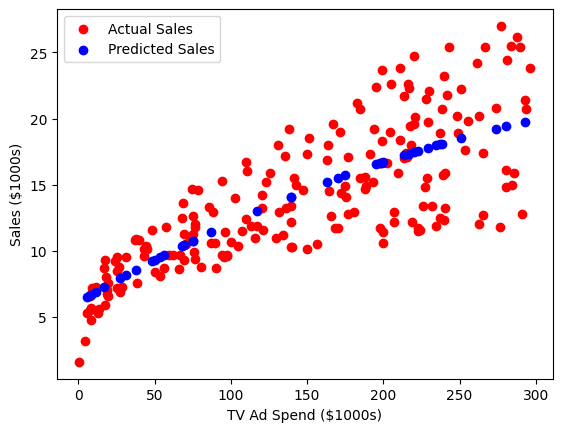

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Load dataset
df = pd.read_csv("Advertising.csv")

# Selecting relevant features
X = df[['TV']]  # Ad spending on TV
y = df['Sales']

# Transforming to Polynomial Features
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

# Train model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Visualization
plt.scatter(X, y, color='red', label="Actual Sales")
plt.scatter(X_test[:, 1], y_pred, color='blue', label="Predicted Sales")
plt.xlabel("TV Ad Spend ($1000s)")
plt.ylabel("Sales ($1000s)")
plt.legend()
plt.show()


In [18]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)
rmse = np.sqrt(mse)
print("Root Mean Squared Error:", rmse)


Mean Squared Error: 10.020098447655151
Root Mean Squared Error: 3.1654539086290847


#4️⃣ Lasso Regression – Disease Prediction (Diabetes)


In [19]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.metrics import accuracy_score

# Load dataset
df = pd.read_csv("diabetes.csv")

# Selecting features and target
X = df.drop(columns=['Outcome'])
y = df['Outcome']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Lasso Regression model
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)

# Predictions
y_pred = lasso.predict(X_test)
y_pred = [1 if i > 0.5 else 0 for i in y_pred]  # Convert to binary classification

# Model Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Selected Features Coefficients:", lasso.coef_)


Accuracy: 0.7532467532467533
Selected Features Coefficients: [ 0.          0.00574864 -0.00158127  0.00042684 -0.00023131  0.01355058
  0.          0.0070836 ]


#5️⃣ Ridge Regression – Stock Market Price Prediction


In [21]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

# Load dataset
df = pd.read_csv("AAPL.csv")  # Apple stock price dataset

# Selecting features
X = df[['Open', 'High', 'Low', 'Volume']]  # Market indicators
y = df['Close']  # Predicting closing price

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Ridge Regression model
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)

# Predictions
y_pred = ridge.predict(X_test)

# Model Evaluation
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("Ridge Coefficients:", ridge.coef_)


Mean Squared Error: 0.11634990213836872
Ridge Coefficients: [-5.41098234e-01  7.52557442e-01  7.89128350e-01  1.27526368e-10]


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=3.20831e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
